<a href="https://colab.research.google.com/github/BigSekas/WB_mirea/blob/main/Workbook7_Mironov_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Рабочая тетрадь No7

### 1.1.1 Пример
Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным.

In [ ]:
# класс, который реализует перспептрон и его обучение
class Perceptron:
    def __init__(self,N):
        # создать нулевые веса
        self.w = list()
        for i in range(N):
            self.w.append( 0)
    #метод для вычисления значения перспептрона
    def calc(self,x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res
    # пороговая функция активации перспептрона
    def sign(self,x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1
    # обучение на одном примере
    def learn(self, la, x, y):
        #обучаем только, когда результат неверный
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]
    #обучение по всем данным Т - кортеж примеров
    def learning(self, la, T):
        #цикл обучения
        for n in range(100):
            #обучение по всем набору примеров
            for t in T:
                self.learn(la,t[0], t[1])

В строке 25 мы осуществляем корректировку весов. Посмотрим, как учится
и работает наш персептрон.

In [ ]:
# создаем класс двумерного перспетрона
perceptron = Perceptron(2)
la = 0.1 # константа обучения
# создаём примеры
T = list()
T.append([[2,1],1])
T.append([[3,2],1])
T.append([[4,1],1])
T.append([[1,2],-1])
T.append([[2,3],-1])
T.append([[5,7],-1])
perceptron.learning(la,T) # обучение перспетрона
print(perceptron.w) # печатаем веса
# проверим работу на тестовых примерах
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


Видим, что что наш персептрон отлично научился распознавать образы, относя к классу 1 те вектора, у которых первая компонента больше второй, и к классу -1 в противном случае. Хотя устройство персептронов довольно простое эти конструкции могут решать и практические задачи. Кроме того, из таких персептронов состоят нейронные сети.

### 1.1.2 Пример
Для написания кода нейрона будем использовать библиотеку Pytnon — NumPy:

In [ ]:
import numpy as np
def sigmoid(x):
    # Функция активации: f(x) = 1 / (1 + e*(-x))
    return 1 / (1 + np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1])  # w1 = 0, w2 = 1
bias = 4                    # с = 4
n = Neuron(weights, bias)
x = np.array([2, 3])        # x = 2, y = 3
print(n.feedforward(x))     # 0.9990889488055994

0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов.
Пример несложной нейронной сети

![img](https://i.ibb.co/0Cpmr9y/image.png)

где:
- x1, x2 — входной слой;
- h1, h2 — скрытый слой с двумя нейронами;
- o1 — выходной слой.
Например. Представим, что нейроны из графика выше имеют веса [0, 1]. Пороговое значение (b) у обоих нейронов равно 0 и они имеют идентичную сигмоиду.

При входных данных x = [2, 3] получим:

![img](https://i.ibb.co/m4wBZ4d/image.png)

Входные данные по нейронам передаются до тех пор, пока не получатся выходные значения.

In [ ]:
import numpy as np
class OurNeuralNetwork:


    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        # Knacc Neuron u3 предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Входы для o1 — это входы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


### Задание (1.1.2)
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.
Данные нейросети:
- три входа (x1, x2, x3);
- три нейрона в скрытых слоях (h1, h2, h3);
- выход (o1)

Нейроны имеют идентичные веса и пороги:
- w = [0.5, 0.5, 0.5]
- b = 0

Данные нейросети:
- два входа (x1, x2);
- два нейрона в скрытых слоях (h1, h2);
- два выхода (o1, o2)

Нейроны имеют идентичные веса и пороги:
- w = [1, 0];
- b = 1

In [ ]:
def sigmoid(x):
    # Функция активации: f(x) = 1 / (1 + e*(-x))
    return 1 / (1 + np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1])  # w1 = 0, w2 = 1
bias = 4                    # с = 4
n = Neuron(weights, bias)
x = np.array([2, 3])        # x = 2, y = 3
print(n.feedforward(x))     # 0.9990889488055994

0.9990889488055994


In [ ]:
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5]) # w = [1,0]
        bias = 0 # b = 1
        # Knacc Neuron u3 предыдущего раздела
        self.h1 = Neuron(weights, bias) # 1 нейрон
        self.h2 = Neuron(weights, bias) # 2 нейрон
        self.h3 = Neuron(weights, bias) # 2 нейрон
        self.o1 = Neuron(weights, bias) # 1 выход
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h2.feedforward(x)
        # Входы для o1 — это входы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3, 4])
print(network.feedforward(x)) # 0.7216325609518421

0.8151036049051821


In [ ]:
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([1, 0]) # w = [1,0]
        bias = 1 # b = 1
        # Knacc Neuron u3 предыдущего раздела
        self.h1 = Neuron(weights, bias) # 1 нейрон
        self.h2 = Neuron(weights, bias) # 2 нейрон
        self.o1 = Neuron(weights, bias) # 1 выход
        self.o2 = Neuron(weights, bias) # 2 выход
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Входы для o1 — это входы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

(0.8757270529783324, 0.8757270529783324)


### Задание
Реализуйте классы нейронных сетей с использованием других функций активации.

![img](https://i.ibb.co/Ln939nY/image.png)

In [ ]:
## Sigmoid
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

class Neuron1:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward (self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron1(weights, bias)
        self.h2 = Neuron1(weights, bias)
        self.h3 = Neuron1(weights, bias)
        self.o1 = Neuron1(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

class OrNeuralNetwork:
    def __init__(self):
        weights = np.array([1,0])
        bias = 1

        self.h1 = Neuron1(weights, bias)
        self.h2 = Neuron1(weights, bias)
        self.o1 = Neuron1(weights, bias)
        self.o2 = Neuron1(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2


network = OurNeuralNetwork()
x = np.array ([2, 3, 4])
print (network.feedforward(x))

network = OrNeuralNetwork()
x = np.array ([2, 3])
print (network.feedforward(x))

0.8151036049051821
(0.8757270529783324, 0.8757270529783324)


In [ ]:
## Tanh
def tanh(x):
    return np.tan(x)


class Neuron2:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward (self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron2(weights, bias)
        self.h2 = Neuron2(weights, bias)
        self.h3 = Neuron2(weights, bias)
        self.o1 = Neuron2(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork()
x = np.array ([2, 3, 4])
print (network.feedforward(x))

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([1,0])
        bias = 1

        self.h1 = Neuron2(weights, bias)
        self.h2 = Neuron2(weights, bias)
        self.o1 = Neuron2(weights, bias)
        self.o2 = Neuron2(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2

network = OurNeuralNetwork()
x = np.array ([2, 3])
print (network.feedforward(x))

0.7968426715486405
(1.1555911185916798, 1.1555911185916798)


In [ ]:
## ReLU
def ReLU(x):
    return np.maximum(0, x)

class Neuron3:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward (self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron3(weights, bias)
        self.h2 = Neuron3(weights, bias)
        self.h3 = Neuron3(weights, bias)
        self.o1 = Neuron3(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork()
x = np.array ([2, 3, 4])
print (network.feedforward(x))

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([1,0])
        bias = 1

        self.h1 = Neuron3(weights, bias)
        self.h2 = Neuron3(weights, bias)
        self.o1 = Neuron3(weights, bias)
        self.o2 = Neuron3(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2

network = OurNeuralNetwork()
x = np.array ([2, 3])
print (network.feedforward(x))

6.75
(4, 4)


### Задание
Используйте классы MLPClassified и MLPRegressor для классификации и регрессии произвольных данных из интернета. Проведите анализ атрибуты, полученных моделей.

Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

а для регрессии датасет зависимости заработной платы от опыта работы:

https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv

MLPClassifier — это клвсс, доступный как часть модуля neuro_network
sklearn для выполнения задач классификации с использованием
многослойного персептрона.

In [ ]:
# MLPClassifier — это клвсс, доступный как часть модуля neuro_network
# sklearn для выполнения задач классификации с использованием
# многослойного персептрона.

import pandas as pd
from sklearn.model_selection import train_test_split
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df.head(5)
df
df = df.rename(columns={'variety': 'target'})
X_df, Y_df = df.drop(['target'], axis=1), df.target
print('Dataset Size: ', X_df.shape, Y_df.shape)
# Функция train_test_split модуля model_selection sklearn поможет нам
# разделить данные на два набора: 80% для обучения и 20% для тестирования.
# Мы также используем seed(random_state=123) с train_test_split, чтобы мы
# всегда получали одно и то же разделение и могли сравнивать и
# воспроизволить результаты в будущем.
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, train_size=0.80, test_size=0.20, stratify=Y_df, random_state=123)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
from sklearn.neural_network import MLPClassifier

# Для начала натренируем модель MLPClassifier с параметрами по умолчанию
# для тренировочных данных.
mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])
# Метод score для оценки точности моделей классификации
print('Test Accuracy: %.3f' % mlp_classifier.score(X_test, Y_test))
print('Training Accuracy: %.3f' % mlp_classifier.score(X_train, Y_train))

# loss_ — возвращает убыток после завершения процесса обучения
print('Loss: ', mlp_classifier.loss_)
# coefs_ — возвращает массив длины n_layers-1, где каждый элемент представляет веса, связанные с уровнем i
print('Number of Coefs: ', len(mlp_classifier.coefs_))
# intercepts_ — возвращает массив длины n_layers-1, где каждый элемент представляет собой перехват, связанный с персептронами слоя i
print('Number of Intercepts: ', len(mlp_classifier.intercepts_))
# n_iter_ — количество итераций, для которых выполнялась оценка
print('Number of Iteration for Which Estimator Ran: ', mlp_classifier.n_iter_)
# out_activation_ — возвращает имя функции активации выходного слоя.
print('Name of Output Layer Activation Function: ', mlp_classifier.out_activation_)

Dataset Size:  (150, 4) (150,)
(120, 4) (30, 4) (120,) (30,)
['Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Setosa' 'Setosa'
 'Virginica' 'Virginica' 'Virginica' 'Setosa' 'Setosa' 'Versicolor'
 'Virginica' 'Versicolor' 'Virginica']
80     Versicolor
45         Setosa
144     Virginica
110     Virginica
38         Setosa
2          Setosa
135     Virginica
72     Versicolor
138     Virginica
34         Setosa
19         Setosa
77     Versicolor
101     Virginica
63     Versicolor
117     Virginica
Name: target, dtype: object
Test Accuracy: 0.933
Training Accuracy: 0.983
Loss:  0.29887893401974336
Number of Coefs:  2
Number of Intercepts:  2
Number of Iteration for Which Estimator Ran:  200
Name of Output Layer Activation Function:  softmax


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor — это класс, доступный как часть библиотеки
neuro_network sklearn для выполнения задач регрессии с использованием
многослойного персептрона.

In [ ]:
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
df = pd.read_csv(url)
df.head(5)
df
df = df.rename(columns={'Salary':'target'})
X_df, Y_df = df.drop(['target'], axis=1), df.target
print ('Dataset Size: ', X_df.shape, Y_df.shape)
# Функция train_test_split модуля model_selection sklearn поможет нам
# разделить данные на два набора: 80% для обучения и 20% для тестирования.
# Мы также используем seed(random_state=123) с train_test_split, чтобы мы
# всегда получали одно и то же разделение и могли сравнивать и
# воспроизволить результаты в будущем.
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, train_size = 0.80, test_size = 0.20, random_state = 123)
print ('Train/Test size: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)
Y_preds = mlp_regressor.predict(X_test)

print (Y_preds[:10])
print (Y_test[:10])
print ('Test R^2 Score: %.3f'%mlp_regressor.score(X_test, Y_test))
print ('Training R^2 Score: %.3f'%mlp_regressor.score(X_train, Y_train))

print ('Loss: ', mlp_regressor.loss_)
print ('Number of Coefs: ', len(mlp_regressor.coefs_))
print ('Number of Intercepts: ', len(mlp_regressor.intercepts_))
print ('Number of Iteration for Which Estimator Ran: ', mlp_regressor.n_iter_)
print ('Name of Output Layer Activation Function: ', mlp_regressor.out_activation_)


Dataset Size:  (30, 1) (30,)
Train/Test size:  (24, 1) (6, 1) (24,) (6,)
[20.26234628 55.2781752  18.82135812 50.48274487 20.26234628 50.9622879 ]
7      54445.0
29    121872.0
5      56642.0
26    116969.0
8      64445.0
27    112635.0
Name: target, dtype: float64
Test R^2 Score: -8.796
Training R^2 Score: -8.261
Loss:  2988058032.1601596
Number of Coefs:  2
Number of Intercepts:  2
Number of Iteration for Which Estimator Ran:  200
Name of Output Layer Activation Function:  identity


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Загрузка библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
x_digits, y_digits = digits.data, digits.target
print('Dataset Sizes : ', x_digits.shape, y_digits.shape)

Dataset Sizes :  (1797, 64) (1797,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, train_size=.80, test_size=.20, stratify=y_digits, random_state=123)
print('Train/Test Sizes : ', x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Train/Test Sizes :  (1437, 64) (360, 64) (1437,) (360,)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(x_train, y_train)

MLPClassifier(random_state=123)

In [ ]:
y_preds = mlp_classifier.predict(x_test)

print(y_preds[:15])
print(y_test[:15])
# Метод Score для оценки точности моделей классификации
print('Test Accuracy : %.3f'%mlp_classifier.score(x_test, y_test))

print('Training Accuracy : %.3f'%mlp_classifier.score(x_train, y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


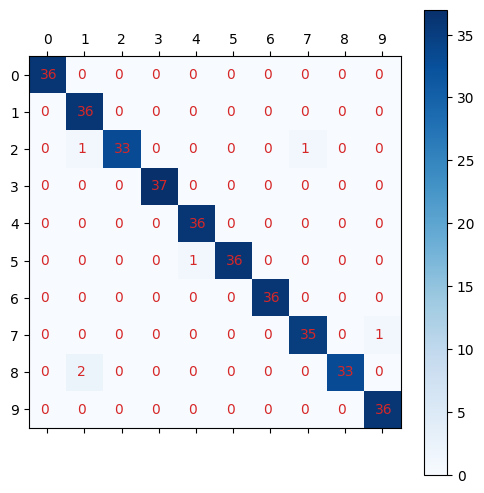

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_preds):
    conf_mat = confusion_matrix(y_test, y_preds)

    fig = plt.figure(figsize=(6, 6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar()
    for i in range(10):
        for j in range(10):
            plt.text(i - .2, j + .1, str(conf_mat[j, i]), color='tab:red')

plot_confusion_matrix(y_test, mlp_classifier.predict(x_test))

In [ ]:
print('Loss : ', mlp_classifier.loss_)
print('Number of Coefs : ', len(mlp_classifier.coefs_))
print('Number of Intercepts : ', len(mlp_classifier.intercepts_))
print('Number of Iterations for Which Estimator Ran : ', mlp_classifier.n_iter_)
print('Name of Output Layer Activation Function : ', mlp_classifier.out_activation_)

Loss :  0.0034728684994180608
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  125
Name of Output Layer Activation Function :  softmax
